## Multiple Linear Regression

In [274]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [275]:
# Read csv
file_path = '../data/final/wo_na.csv'
df = pd.read_csv(file_path)
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

In [276]:
# Define x and y variables
X = df[['Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
         'Monthly Export of Semis & Finished Steel as % of Production',
         'FAI in urban real estate development (y-o-y) Growth',
         'Automobile Production (y-o-y)', 'Civil Metal-Vessels/Steel Ships (y-o-y)',
         'Household Fridges (y-o-y)', 'Air Conditioner (y-o-y)']]
y = df['HRC (FOB, $/t)']

In [277]:
# Scale x variables since they are of different magnitudes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.21162485e+00 -9.06443942e-01 -1.35172198e+00 ... -1.29702093e-01
   1.85324573e+00 -3.72634321e-01]
 [-1.13077569e+00 -1.24208298e+00 -1.27679578e+00 ...  8.01746133e-02
   1.67753934e+00 -2.07643759e-01]
 [-1.13077569e+00 -1.25291005e+00 -1.25806423e+00 ... -4.03101625e-02
   1.46522744e+00 -1.78181158e-01]
 ...
 [-1.33636003e-01  6.79919871e-02 -4.71339093e-01 ... -3.20145771e-01
  -1.16130105e-01 -1.42826038e-01]
 [-2.68384609e-01 -1.37722265e-01 -5.55631072e-01 ... -3.20145771e-01
  -1.01487906e-01 -1.31040997e-01]
 [ 1.11260317e-03  4.63378553e-02 -3.96412890e-01 ... -3.12372560e-01
  -2.82769083e-02 -1.19255957e-01]]


In [278]:
# Split into training and testing sets with a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Linear Regression
$$ y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon $$

In [279]:
# Model fitting
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [280]:
# Obtain regression model coefficients
print('Intercept: ', model.intercept_)
list(zip(X, model.coef_))

Intercept:  561.1645668841684


[('Iron Ore (CFR, $/t)', -9.384415874000291),
 ('HCC (Aus FOB, $/t)', 47.81775343882917),
 ('Domestic Scrap (DDP Jiangsu incl. VAT $/t)', 95.40975903578301),
 ('Monthly Export of Semis & Finished Steel as % of Production',
  24.656108421724596),
 ('FAI in urban real estate development (y-o-y) Growth', 23.913225257344877),
 ('Automobile Production (y-o-y)', 5.934291972177653),
 ('Civil Metal-Vessels/Steel Ships (y-o-y)', 4.206376648523982),
 ('Household Fridges (y-o-y)', 4.837634459574199),
 ('Air Conditioner (y-o-y)', -14.101402577613555)]

In [281]:
# Model predictions
y_pred = model.predict(X_test)

In [282]:
# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('R-squared: ', r2)

Mean Absolute Error:  48.088719275718354
Mean Squared Error:  6110.991903377354
Root Mean Squared Error:  78.1728335381119
R-squared:  0.7393035691370786


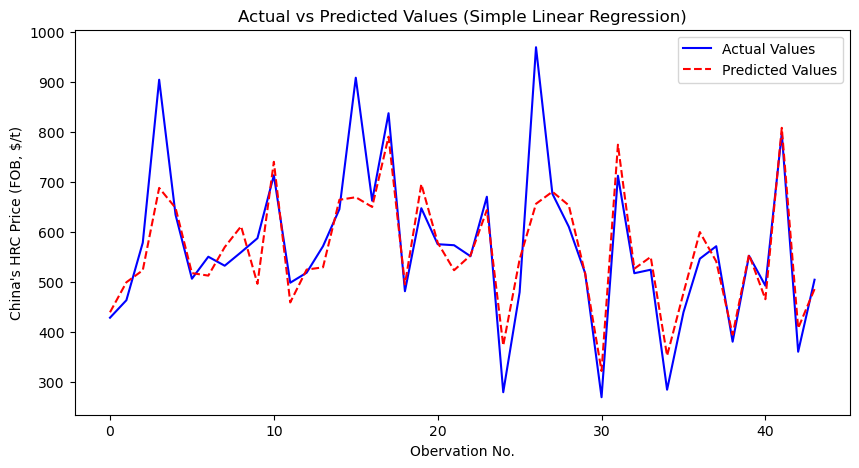

In [283]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test)), y_test, label="Actual Values", color="blue")
plt.plot(np.arange(len(y_pred)), y_pred, label="Predicted Values", color="red", linestyle="dashed")

plt.xlabel("Obervation No.")
plt.ylabel("China's HRC Price (FOB, $/t)")
plt.title("Actual vs Predicted Values (Simple Linear Regression)")
plt.legend()
plt.show()

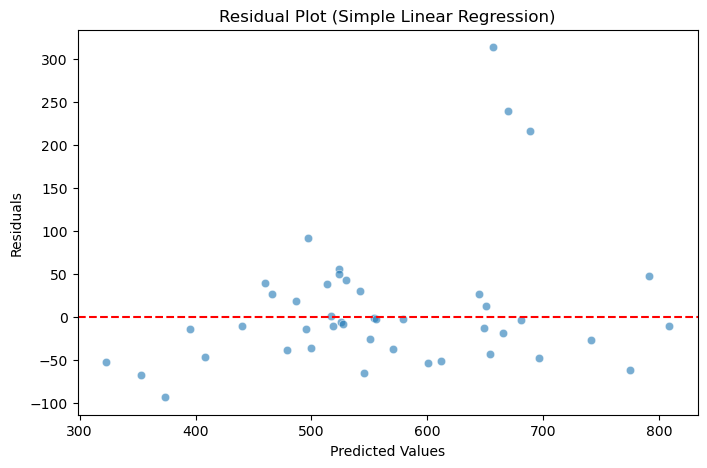

In [284]:
residuals = y_test - y_pred  # Compute residuals

# Plot residuals vs. predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)  # Scatter plot
plt.axhline(y=0, color="red", linestyle="--")  # Horizontal line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Simple Linear Regression)")
plt.show()

### Input VAR forecasted x variables into Regression model

In [285]:
# Read csv
file_path = '../data/final/var_forecast.csv'
var_forecast_df = pd.read_csv(file_path)
var_forecast_df.set_index('Date', inplace=True)
var_forecast_df.head()

,"HRC (FOB, $/t)_1d","Iron Ore (CFR, $/t)_1d","HCC (Aus FOB, $/t)_1d",Domestic Scrap (DDP Jiangsu incl. VAT $/t)_1d,Monthly Export of Semis & Finished Steel as % of Production_1d,FAI in urban real estate development (y-o-y) Growth_1d,Automobile Production (y-o-y)_1d,Civil Metal-Vessels/Steel Ships (y-o-y)_1d,Household Fridges (y-o-y)_1d,Air Conditioner (y-o-y)_1d,"HRC (FOB, $/t)_forecast","Iron Ore (CFR, $/t)_forecast","HCC (Aus FOB, $/t)_forecast",Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast,Monthly Export of Semis & Finished Steel as % of Production_forecast,FAI in urban real estate development (y-o-y) Growth_forecast,Automobile Production (y-o-y)_forecast,Civil Metal-Vessels/Steel Ships (y-o-y)_forecast,Household Fridges (y-o-y)_forecast,Air Conditioner (y-o-y)_forecast
Date,,,,,,,,,,,,,,,,,,,,
2024-11-01,15.715296,6.099946,2.971304,7.006252,0.250739,-0.068023,-0.905197,-0.836485,-0.166616,-0.689199,533.322322,104.461386,232.442921,402.923488,7.681345,-14.469970,-3.299769,-5.647595,5.421792,6.602450
2024-12-01,11.997200,1.633983,6.690259,1.827389,-0.188093,0.012015,0.955910,0.117517,-0.302735,0.489227,545.319522,106.095368,239.133180,404.750877,7.493252,-14.457955,-2.343860,-5.530078,5.119057,7.091677
2025-01-01,5.257965,1.924460,2.038433,1.435680,0.060266,-0.098758,0.171080,0.878248,-0.761128,-0.971385,550.577486,108.019829,241.171613,406.186557,7.553518,-14.556713,-2.172779,-4.651830,4.357930,6.120292
2025-02-01,1.212697,0.216504,3.249279,-4.762764,0.369704,-0.041140,-1.008147,-0.880374,-0.181342,-0.027186,551.790183,108.236333,244.420892,401.423793,7.923223,-14.597853,-3.180926,-5.532204,4.176588,6.093106
2025-03-01,-2.708218,-1.545835,-0.429143,-3.507602,-0.023040,-0.126006,-0.846587,-0.649913,-0.270594,0.379147,549.081965,106.690497,243.991749,397.916191,7.900183,-14.723859,-4.027513,-6.182117,3.905993,6.472253


In [286]:
# Obtain forecasted x variables
forecasted_X = var_forecast_df[['Iron Ore (CFR, $/t)_forecast', 'HCC (Aus FOB, $/t)_forecast',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast',
         'FAI in urban real estate development (y-o-y) Growth_forecast',
         'Automobile Production (y-o-y)_forecast', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast',
         'Household Fridges (y-o-y)_forecast', 'Air Conditioner (y-o-y)_forecast']]

In [287]:
# Scale x variables
scaler = StandardScaler()
forecasted_X_scaled = scaler.fit_transform(forecasted_X)

In [288]:
# Obtain y forecast
y_forecast = model.predict(forecasted_X_scaled)

fc_period = pd.date_range(start='11/1/2024', end='3/1/2026', freq='MS')
df_forecast = pd.DataFrame(y_forecast, index=fc_period, columns=['HRC (FOB, $/t)_f'])
df_forecast.index.name = 'Date'
df_forecast

,"HRC (FOB, $/t)_f"
Date,
2024-11-01,592.611489
2024-12-01,693.322222
2025-01-01,783.757984
2025-02-01,705.389283
2025-03-01,574.701834
2025-04-01,493.744530
2025-05-01,403.287437
2025-06-01,374.440639
2025-07-01,432.375849


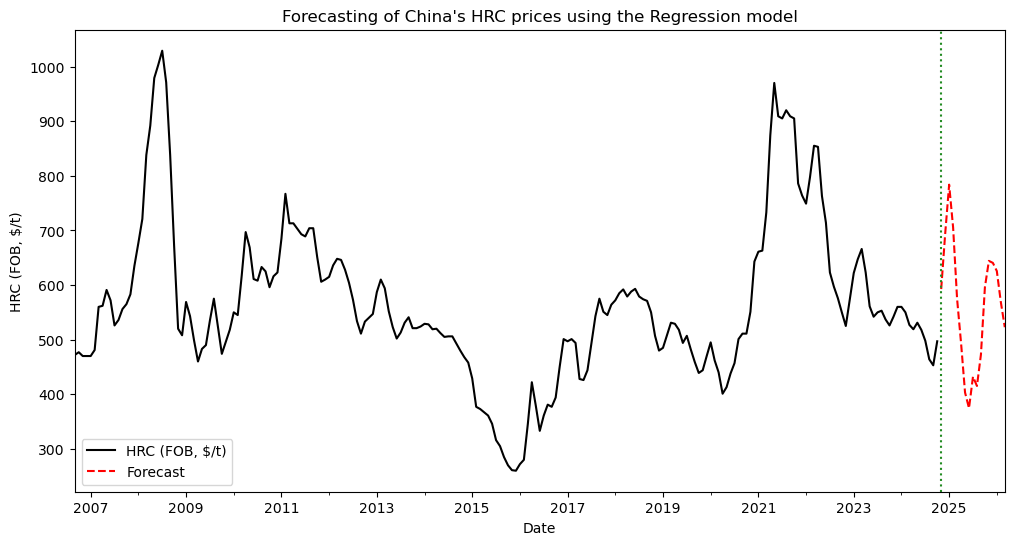

In [289]:
# Plot forecast
fig, ax = plt.subplots(figsize=(12, 6))

df['HRC (FOB, $/t)'].plot(color='k')
df_forecast['HRC (FOB, $/t)_f'].plot(color='r', linestyle ='dashed', label='Forecast')

plt.title("Forecasting of China's HRC prices using the Regression model")
plt.ylabel("HRC (FOB, $/t)")
plt.xlabel("Date")
plt.axvline(x = '2024-11-01', color = 'forestgreen', linestyle = 'dotted')
ax.legend()

### Report forecast data

In [290]:
data = {
    'Date': ['2024-09-01', '2024-12-01', '2025-03-01', '2025-06-01', '2025-09-01', '2025-12-01', '2026-03-01'],
    'HCC (Aus FOB, $/t)_forecast': [213, 210, 210, 211, 206, 205, 205]
}
report_df = pd.DataFrame(data)
report_df['Date'] = pd.to_datetime(report_df['Date'])
report_df.set_index('Date', inplace=True)

In [291]:
monthly_linear = report_df.resample('MS').interpolate(method='linear')
print(monthly_linear)

            HCC (Aus FOB, $/t)_forecast
Date                                   
2024-09-01                   213.000000
2024-10-01                   212.000000
2024-11-01                   211.000000
2024-12-01                   210.000000
2025-01-01                   210.000000
2025-02-01                   210.000000
2025-03-01                   210.000000
2025-04-01                   210.333333
2025-05-01                   210.666667
2025-06-01                   211.000000
2025-07-01                   209.333333
2025-08-01                   207.666667
2025-09-01                   206.000000
2025-10-01                   205.666667
2025-11-01                   205.333333
2025-12-01                   205.000000
2026-01-01                   205.000000
2026-02-01                   205.000000
2026-03-01                   205.000000


In [292]:
monthly_linear.drop(['2024-09-01', '2024-10-01'], inplace=True)

In [293]:
# Obtain forecasted x variables
forecasted_X_2 = var_forecast_df[['Iron Ore (CFR, $/t)_forecast', 'HCC (Aus FOB, $/t)_forecast',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast',
         'FAI in urban real estate development (y-o-y) Growth_forecast',
         'Automobile Production (y-o-y)_forecast', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast',
         'Household Fridges (y-o-y)_forecast', 'Air Conditioner (y-o-y)_forecast']]

forecasted_X_2['HCC (Aus FOB, $/t)_forecast'] = monthly_linear['HCC (Aus FOB, $/t)_forecast']

/var/folders/kk/49b6qgnj201cbhch83b6xr740000gn/T/ipykernel_96901/2115407433.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_X_2['HCC (Aus FOB, $/t)_forecast'] = monthly_linear['HCC (Aus FOB, $/t)_forecast']


In [294]:
# Scale x variables
scaler = StandardScaler()
forecasted_X_scaled2 = scaler.fit_transform(forecasted_X_2)

In [295]:
# Obtain y forecast
y_forecast_2 = model.predict(forecasted_X_scaled2)

fc_period = pd.date_range(start='11/1/2024', end='3/1/2026', freq='MS')
df_forecast_2 = pd.DataFrame(y_forecast_2, index=fc_period, columns=['HRC (FOB, $/t)_f'])
df_forecast_2.index.name = 'Date'
df_forecast_2

,"HRC (FOB, $/t)_f"
Date,
2024-11-01,756.960429
2024-12-01,752.298459
2025-01-01,816.607614
2025-02-01,696.592900
2025-03-01,571.405776
2025-04-01,517.779153
2025-05-01,504.153166
2025-06-01,499.877224
2025-07-01,510.703071


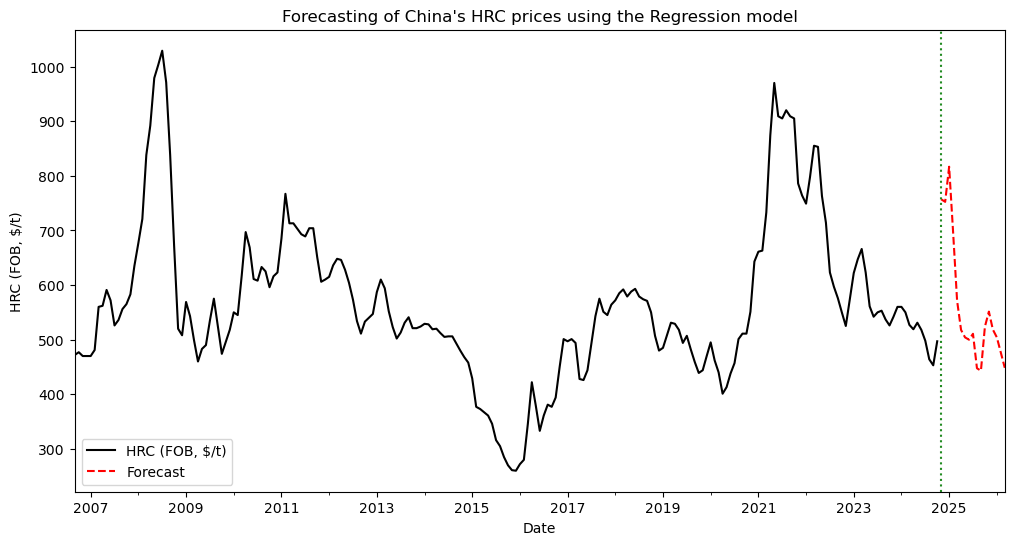

In [296]:
# Plot forecast
fig, ax = plt.subplots(figsize=(12, 6))

df['HRC (FOB, $/t)'].plot(color='k')
df_forecast_2['HRC (FOB, $/t)_f'].plot(color='r', linestyle ='dashed', label='Forecast')

plt.title("Forecasting of China's HRC prices using the Regression model")
plt.ylabel("HRC (FOB, $/t)")
plt.xlabel("Date")
plt.axvline(x = '2024-11-01', color = 'forestgreen', linestyle = 'dotted')
ax.legend()

## Polynomial Linear Regression (degree = 2)
$$ y = \beta_0 + \sum_{i=1}^{n} \beta_i X_i + \sum_{i=1}^{n} \beta_{ii} X_i^2 + \sum_{i=1}^{n} \sum_{j=i+1}^{n} \beta_{ij} X_i X_j + \epsilon $$

where:  
- $X_i$ are the original factors affecting China's HRC price.  
- $X_i^2$ are the squared terms capturing nonlinear relationships.  
- $X_i$, $X_j$ are interaction terms, representing how two factors together impact China's HRC price.  

**Reasons for introducing polynomial features** 
* The relationship between the factors and HRC price is nonlinear as shown in the simple regression.  
* The residual plot above shows curved patterns in linear regression . 
* The interactions between the factors may be significant.  
* High-degree polynomial regression can overfit the data.

In [297]:
# Define polynomial transformation
degree = 2
poly = PolynomialFeatures(degree)

# Transform BOTH training and testing data
X_train_poly = poly.fit_transform(X_train)  # Fit and transform for training
X_test_poly = poly.transform(X_test)        # Only transform for testing

# Train the model using transformed training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict using the transformed test data
y_pred_poly = model.predict(X_test_poly)

In [298]:
# Get feature names and coefficients
feature_names = poly.get_feature_names_out(input_features=X.columns)
coefficients = model.coef_

# Display results
pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

,Feature,Coefficient
0,1,1.089961e-14
1,"Iron Ore (CFR, $/t)",5.064440e+01
2,"HCC (Aus FOB, $/t)",3.135388e+01
3,Domestic Scrap (DDP Jiangsu incl. VAT $/t),6.275749e+01
4,Monthly Export of Semis & Finished Steel as % ...,4.389088e+00
5,FAI in urban real estate development (y-o-y) G...,-9.380353e+00
6,Automobile Production (y-o-y),1.988224e+01
7,Civil Metal-Vessels/Steel Ships (y-o-y),8.644870e+00
8,Household Fridges (y-o-y),1.865849e+01
9,Air Conditioner (y-o-y),4.693470e+00


In [299]:
# Error metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print('Mean Absolute Error: ', mae_poly)
print('Mean Squared Error: ', mse_poly)
print('Root Mean Squared Error: ', rmse_poly)
print('R-squared: ', r2_poly)

Mean Absolute Error:  33.80346485377137
Mean Squared Error:  2121.126673468392
Root Mean Squared Error:  46.05569099979276
R-squared:  0.9095122098139679


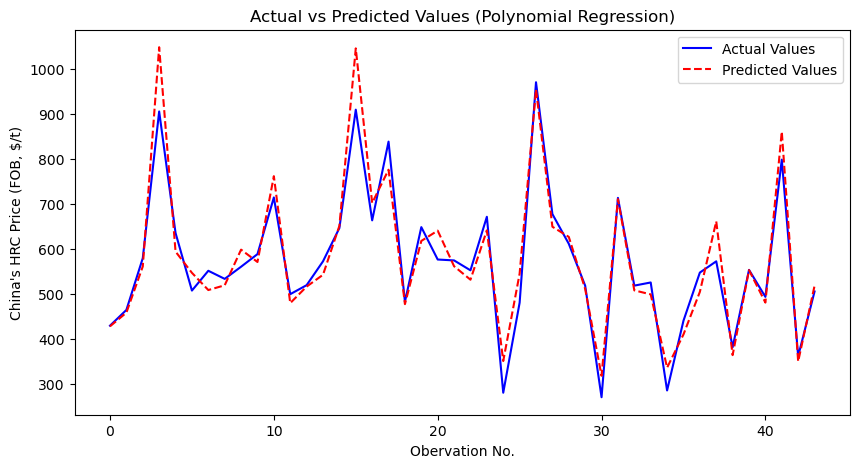

In [300]:
# Assuming y_test and y_pred are 1D arrays
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test)), y_test, label="Actual Values", color="blue")
plt.plot(np.arange(len(y_pred_poly)), y_pred_poly, label="Predicted Values", color="red", linestyle="dashed")

plt.xlabel("Obervation No.")
plt.ylabel("China's HRC Price (FOB, $/t)")
plt.title("Actual vs Predicted Values (Polynomial Regression)")
plt.legend()
plt.show()

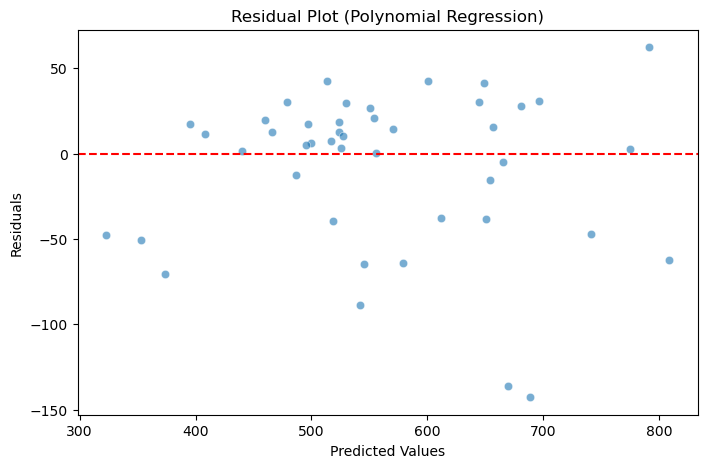

In [301]:
residuals_poly = y_test - y_pred_poly  # Compute residuals

# Plot residuals vs. predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals_poly, alpha=0.6)  # Scatter plot
plt.axhline(y=0, color="red", linestyle="--")  # Horizontal line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.show()

### Input VAR forecasted x variables into Regression model

In [302]:
# Read csv
file_path = '../data/final/var_forecast.csv'
var_forecast_df = pd.read_csv(file_path)
var_forecast_df.set_index('Date', inplace=True)

In [303]:
# Obtain forecasted x variables
forecasted_X = var_forecast_df[['Iron Ore (CFR, $/t)_forecast', 'HCC (Aus FOB, $/t)_forecast',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast',
         'FAI in urban real estate development (y-o-y) Growth_forecast',
         'Automobile Production (y-o-y)_forecast', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast',
         'Household Fridges (y-o-y)_forecast', 'Air Conditioner (y-o-y)_forecast']]

In [304]:
# Scale and transform x variables
scaler = StandardScaler()
forecasted_X_scaled = scaler.fit_transform(forecasted_X)

degree = 2
poly = PolynomialFeatures(degree)
forecasted_X_poly = poly.fit_transform(forecasted_X_scaled)

In [305]:
# Obtain y forecast
y_forecast = model.predict(forecasted_X_poly)

fc_period = pd.date_range(start='11/1/2024', end='3/1/2026', freq='MS')
df_forecast = pd.DataFrame(y_forecast, index=fc_period, columns=['HRC (FOB, $/t)_f'])
df_forecast.index.name = 'Date'
df_forecast

,"HRC (FOB, $/t)_f"
Date,
2024-11-01,278.028464
2024-12-01,811.895339
2025-01-01,971.234903
2025-02-01,977.769837
2025-03-01,699.058184
2025-04-01,477.140277
2025-05-01,445.147319
2025-06-01,543.105205
2025-07-01,504.903935


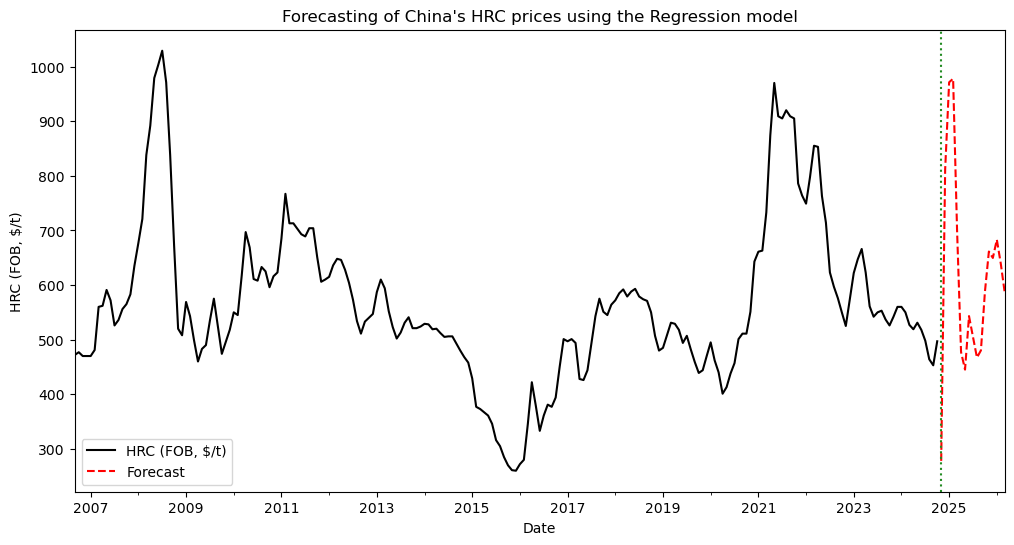

In [306]:
# Plot forecast
fig, ax = plt.subplots(figsize=(12, 6))

df['HRC (FOB, $/t)'].plot(color='k')
df_forecast['HRC (FOB, $/t)_f'].plot(color='r', linestyle ='dashed', label='Forecast')

plt.title("Forecasting of China's HRC prices using the Regression model")
plt.ylabel("HRC (FOB, $/t)")
plt.xlabel("Date")
plt.axvline(x = '2024-11-01', color = 'forestgreen', linestyle = 'dotted')
ax.legend()